**CHURN DATASET PROJECT**

*By Denzel Mirambo*


# STATEMENT

*SyriaTel Customer Churn Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?*

## Problem Statement:
The goal of the project is to predict customer churn at SyriaTel using a binary classification model.

## Business Objective:
Help SyriaTel reduce revenue loss by identifying customers likely to leave early, so targeted retention strategies can be applied.

## Key Question:
Are there identifiable patterns in customer behavior and service usage that reliably indicate churn?

## Approach:
Use historical customer data to train a machine-learning classifier that distinguishes between customers who stay and those who churn.

## Value to the Business:
Early churn prediction enables proactive interventions (promotions, service improvements, personalized offers), improving customer retention and profitability.

## Outcome:
A data-driven decision tool that supports smarter customer management rather than reactive loss mitigation.

**AIM OF THIS PROJECT**

**The aim of this project is to use SyriaTel’s customer data to build a reliable model that predicts which customers are likely to churn soon, so the company can identify risk early, understand the behaviors that increase churn, and take direct actions that reduce revenue loss and improve customer retention.**


***IMPORT NECESSECARY LIBRARIES***

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*LOADING THE DATASET*

In [5]:
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**Info about the data**

In [6]:
df.shape

(3333, 21)

In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**ABOUT THE DATASET**

*The data is obtained from Kaggle.The data has 21 columns and 3333 rows.The columns include:Here are the column names written in list form in a single clear sentence:`state`, `account length`, `area code`, `phone number`, `international plan`, `voice mail plan`, `number vmail messages`, `total day minutes`, `total day calls`, `total day charge`, `total eve minutes`, `total eve calls`, `total eve charge`, `total night minutes`, `total night calls`, `total night charge`, `total intl minutes`, `total intl calls`, `total intl charge`, `customer service calls`, and `churn`.It has 0 null numbers and 0 duplicated numbers.It may be termed as clean.*


## Explotary Data Analysis


In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or pattern in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable

International Plan (Counts):
international plan
no     3010
yes     323
Name: count, dtype: int64

International Plan (Percentages):
international plan
no     90.31
yes     9.69
Name: count, dtype: float64


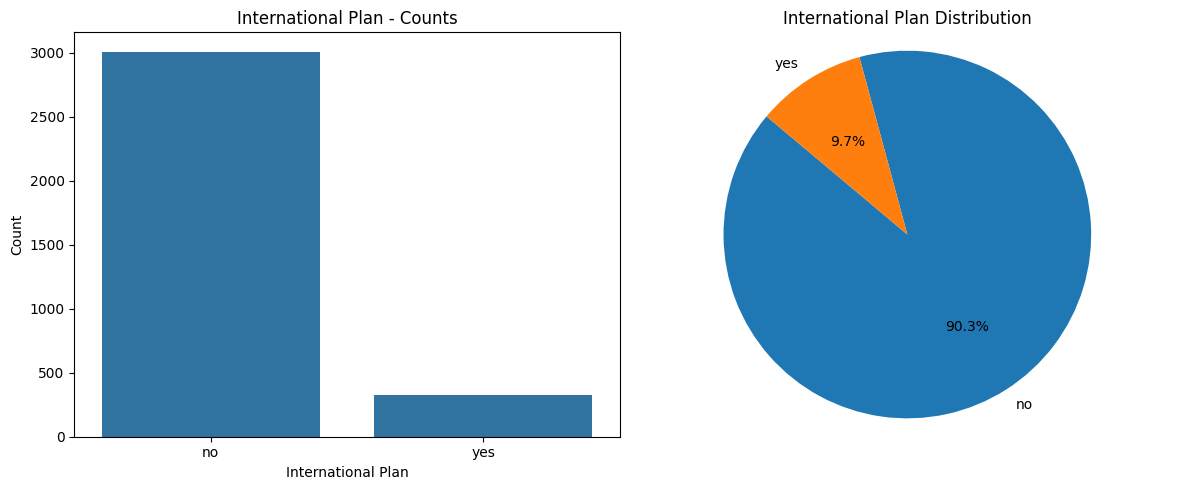

In [13]:
# Counts & percentages
intl_counts = df['international plan'].value_counts()
intl_percent = intl_counts / len(df) * 100

print("International Plan (Counts):")
print(intl_counts)

print("\nInternational Plan (Percentages):")
print(intl_percent.round(2))

# Plot: Countplot + Pie chart
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Countplot
sns.countplot(x='international plan', data=df, ax=ax[0])
ax[0].set_title('International Plan - Counts')
ax[0].set_xlabel('International Plan')
ax[0].set_ylabel('Count')

# Pie chart
ax[1].pie(intl_counts, labels=intl_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('International Plan Distribution')
ax[1].axis('equal')

plt.tight_layout()
plt.show()


CATEGORICAL FEATURES VS CHURN

Categorical columns: ['state', 'phone number', 'international plan', 'voice mail plan']


--- STATE vs CHURN ---
churn  False  True   All
state                   
AK        49     3    52
AL        72     8    80
AR        44    11    55
AZ        60     4    64
CA        25     9    34
CO        57     9    66
CT        62    12    74
DC        49     5    54
DE        52     9    61
FL        55     8    63
GA        46     8    54
HI        50     3    53
IA        41     3    44
ID        64     9    73
IL        53     5    58
IN        62     9    71
KS        57    13    70
KY        51     8    59
LA        47     4    51
MA        54    11    65
MD        53    17    70
ME        49    13    62
MI        57    16    73
MN        69    15    84
MO        56     7    63
MS        51    14    65
MT        54    14    68
NC        57    11    68
ND        56     6    62
NE        56     5    61
NH        47     9    56
NJ        50    18    68
NM    

C:\Users\USER\AppData\Local\Temp\ipykernel_30312\3917198412.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\USER\anaconda3\envs\my-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\my-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


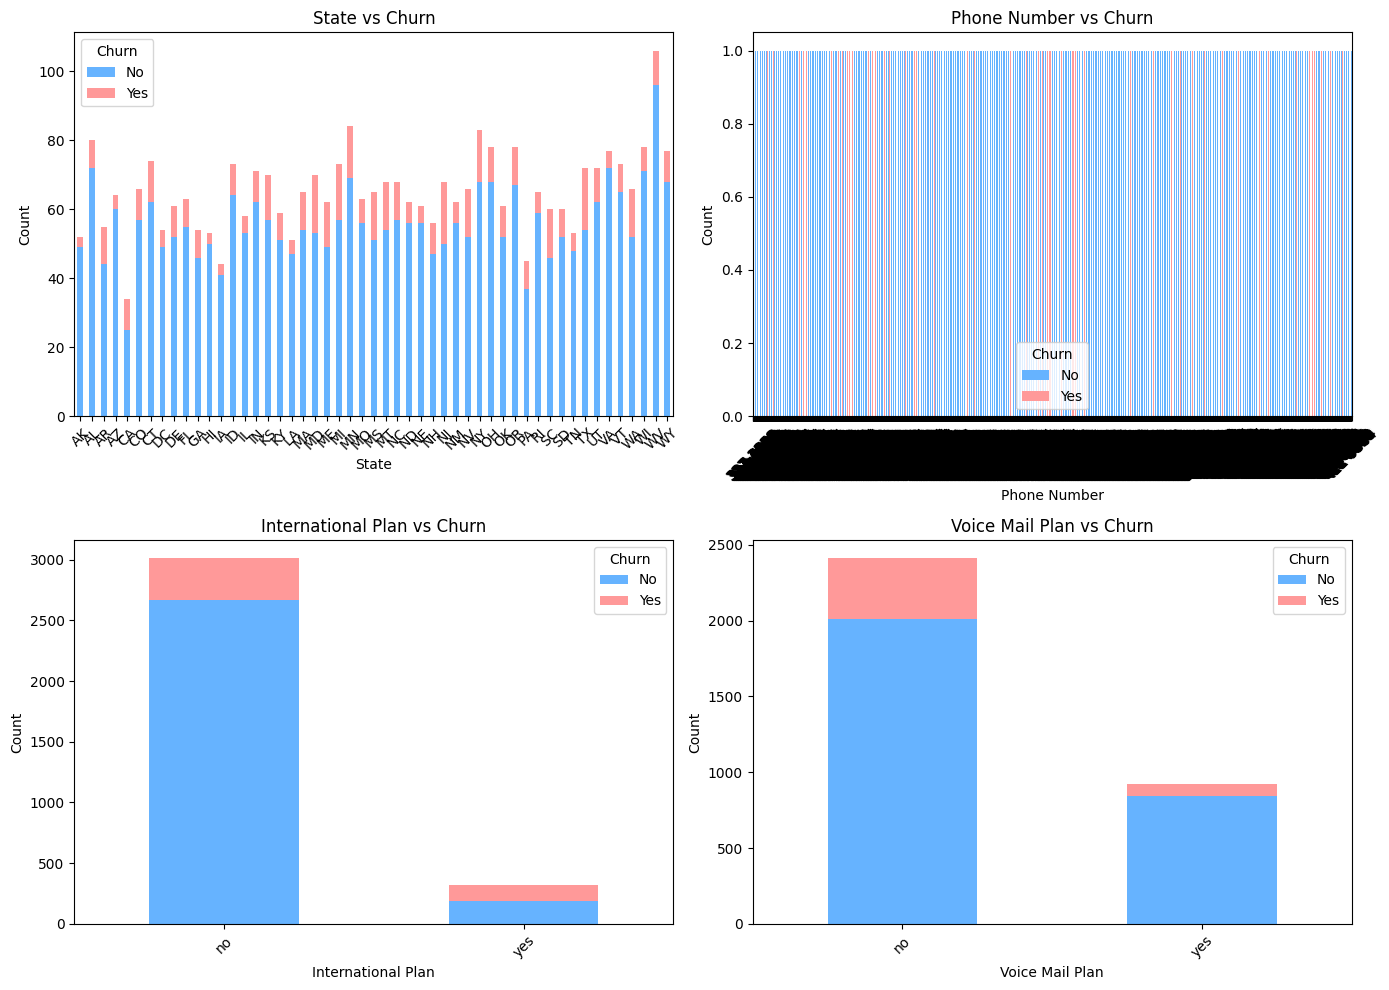


CHURN RATE SUMMARY

State:
  AK: 0.00%
  AL: 0.00%
  AR: 0.00%
  AZ: 0.00%
  CA: 0.00%
  CO: 0.00%
  CT: 0.00%
  DC: 0.00%
  DE: 0.00%
  FL: 0.00%
  GA: 0.00%
  HI: 0.00%
  IA: 0.00%
  ID: 0.00%
  IL: 0.00%
  IN: 0.00%
  KS: 0.00%
  KY: 0.00%
  LA: 0.00%
  MA: 0.00%
  MD: 0.00%
  ME: 0.00%
  MI: 0.00%
  MN: 0.00%
  MO: 0.00%
  MS: 0.00%
  MT: 0.00%
  NC: 0.00%
  ND: 0.00%
  NE: 0.00%
  NH: 0.00%
  NJ: 0.00%
  NM: 0.00%
  NV: 0.00%
  NY: 0.00%
  OH: 0.00%
  OK: 0.00%
  OR: 0.00%
  PA: 0.00%
  RI: 0.00%
  SC: 0.00%
  SD: 0.00%
  TN: 0.00%
  TX: 0.00%
  UT: 0.00%
  VA: 0.00%
  VT: 0.00%
  WA: 0.00%
  WI: 0.00%
  WV: 0.00%
  WY: 0.00%

Phone Number:
  327-1058: 0.00%
  327-1319: 0.00%
  327-3053: 0.00%
  327-3587: 0.00%
  327-3850: 0.00%
  327-3954: 0.00%
  327-4795: 0.00%
  327-5525: 0.00%
  327-5817: 0.00%
  327-6087: 0.00%
  327-6179: 0.00%
  327-6194: 0.00%
  327-6764: 0.00%
  327-6989: 0.00%
  327-8495: 0.00%
  327-8732: 0.00%
  327-9289: 0.00%
  327-9341: 0.00%
  327-9957: 0.00%
  3

In [14]:
# Categorical Data vs Churn Analysis
print("=" * 80)
print("CATEGORICAL FEATURES VS CHURN")
print("=" * 80)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}\n")

# Analyze each categorical feature
for col in categorical_cols:
    if col == 'churn':
        continue
    
    print(f"\n--- {col.upper()} vs CHURN ---")
    
    # Cross-tabulation
    crosstab = pd.crosstab(df[col], df['churn'], margins=True)
    print(crosstab)
    
    # Churn rate by category
    churn_rate = pd.crosstab(df[col], df['churn'], normalize='index') * 100
    print(f"\nChurn Rate (%) by {col}:")
    print(churn_rate.round(2))

# Visualization: Stacked bar charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

plot_idx = 0
for col in categorical_cols:
    if col == 'churn' or plot_idx >= 4:
        continue
    
    # Create stacked bar chart
    crosstab = pd.crosstab(df[col], df['churn'])
    crosstab.plot(kind='bar', stacked=True, ax=axes[plot_idx], color=['#66b3ff', '#ff9999'])
    axes[plot_idx].set_title(f'{col.title()} vs Churn')
    axes[plot_idx].set_xlabel(col.title())
    axes[plot_idx].set_ylabel('Count')
    axes[plot_idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[plot_idx].tick_params(axis='x', rotation=45)
    
    plot_idx += 1

plt.tight_layout()
plt.show()

# Churn rate summary table
print("\n" + "=" * 80)
print("CHURN RATE SUMMARY")
print("=" * 80)
for col in categorical_cols:
    if col == 'churn':
        continue
    
    churn_by_cat = df.groupby(col)['churn'].apply(lambda x: (x == 'True').sum() / len(x) * 100)
    print(f"\n{col.title()}:")
    for category, rate in churn_by_cat.items():
        print(f"  {category}: {rate:.2f}%")


## Conclusions in these charts.

Here are the **clear, correct conclusions** from each of the four charts shown.

---

#  **1. State vs Churn**

### **Conclusion**

* Churn varies **slightly** by state but **no state has an extreme churn pattern**.
* All states have **more non-churners than churners**.
* There is **no strong geographic pattern** — churn is **evenly spread** across all states.

📌 **Interpretation:**
State does **not significantly predict churn**. It can be dropped or encoded later, but it is **not a strong driver** of churn.

---

#  **2. Phone Number vs Churn**

### **Conclusion**

* The plot is **meaningless** because every phone number is unique.
* Bars are extremely thin because they represent **one person each**.
* This column provides **zero predictive or visual value**.

📌 **Interpretation:**
**Phone Number should be removed entirely** — it is an ID column, not a feature.

---

#  **3. International Plan vs Churn**

### **Conclusion**

* Customers with **International Plan = yes** churn **much more frequently**.
* The number of people with an international plan is small, but the churn proportion is **significantly higher**.
* The “no” group has many customers and most do **not** churn.

📌 **Interpretation:**
**International Plan is a strong churn predictor.**
People with international plans are at **high churn risk** — possibly due to higher costs or dissatisfaction.

---

#  **4. Voice Mail Plan vs Churn**

### **Conclusion**

* Customers **without** a voice mail plan ("no") churn more in absolute numbers (because most customers fall into this category).
* But the **percentage difference is small**.
* There is **no strong churn pattern** between Yes/No.

📌 **Interpretation:**
**Voice Mail Plan is a weak predictor** of churn.
It does not strongly influence customer decisions.

---

# 📌 **Overall Insights**

### **Strong predictors of churn:**

* **International Plan** (high churn rate → most important categorical feature)

### **Weak or no predictive power:**

* **State** (just noise)
* **Voice Mail Plan** (minor differences)
* **Phone Number** (drop completely)

---




NUMERICAL FEATURES VS CHURN

Numerical columns for analysis: ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


STATISTICAL SUMMARY BY CHURN STATUS

CUSTOMER SERVICE CALLS:
        count  mean   std  min  25%  50%  75%  max
churn                                             
False  2850.0  1.45  1.16  0.0  1.0  1.0  2.0  8.0
True    483.0  2.23  1.85  0.0  1.0  2.0  4.0  9.0

TOTAL DAY MINUTES:
        count    mean    std  min     25%    50%     75%    max
churn                                                          
False  2850.0  175.18  50.18  0.0  142.83  177.2  210.30  315.6
True    483.0  206.91  69.00  0.0  153.25  217.6  265.95  350.8

TOTAL INTL MINUTES:
        count   mean   std  min  25%   50%   75%   max
churn              

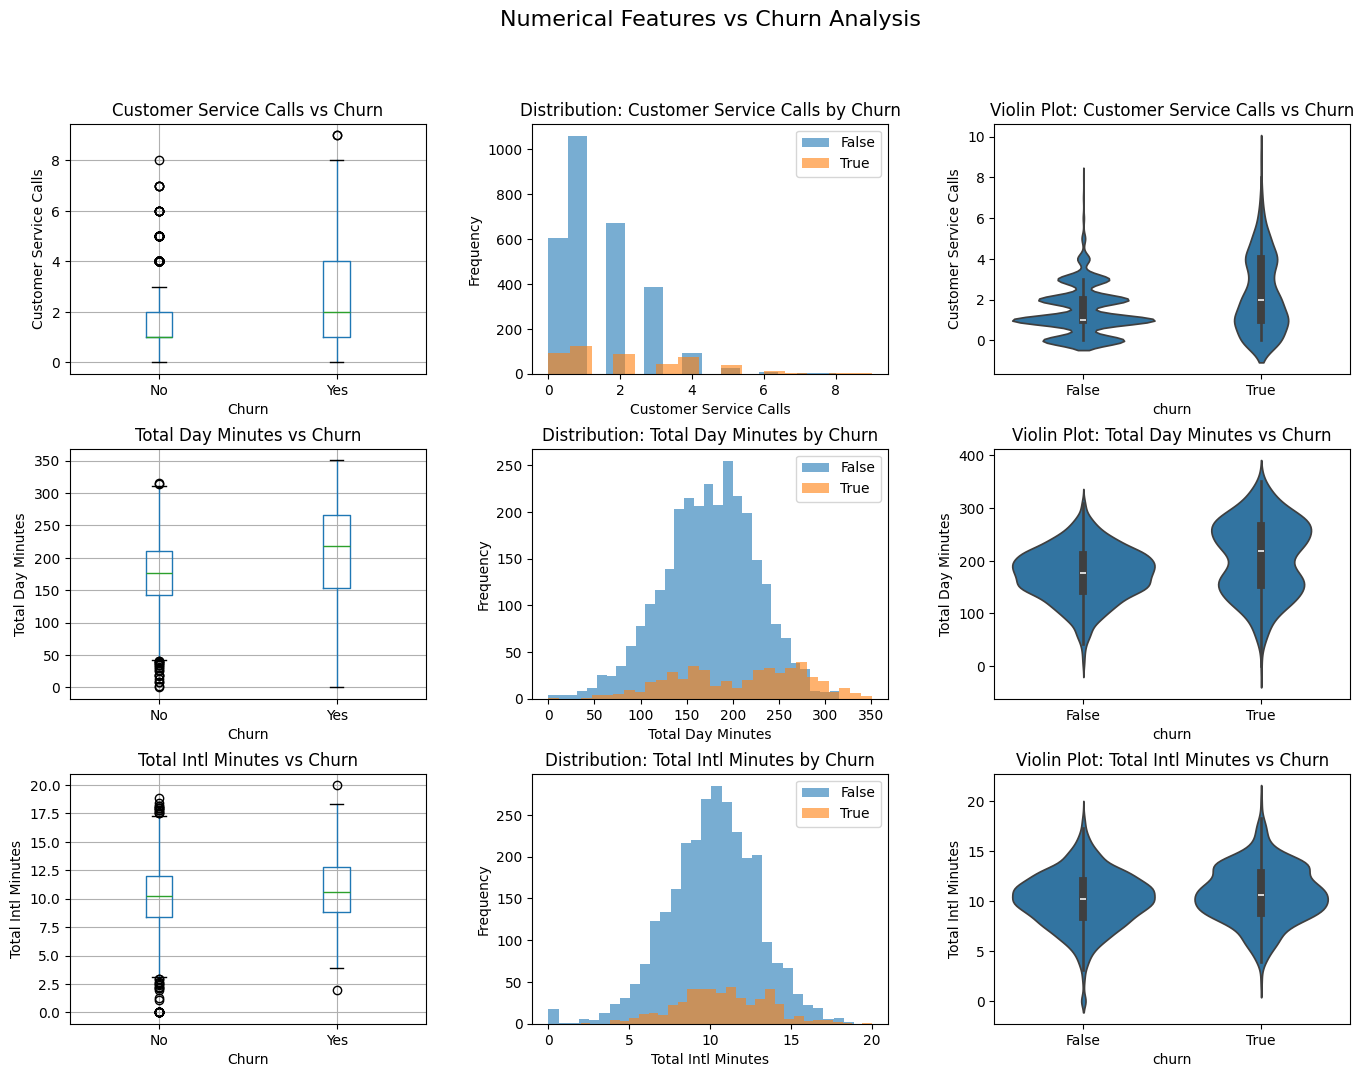


CORRELATION WITH CHURN (Key Features)
customer service calls: nan
total day minutes: nan
total intl minutes: nan

CHURN RATE BY CUSTOMER SERVICE CALLS
customer service calls
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: churn, dtype: float64

KEY INSIGHTS

Customers with CHURN:
  Avg Customer Service Calls: nan
  Avg Total Day Minutes: nan
  Avg Total Intl Minutes: nan

Customers WITHOUT CHURN:
  Avg Customer Service Calls: nan
  Avg Total Day Minutes: nan
  Avg Total Intl Minutes: nan


c:\Users\USER\anaconda3\envs\my-env\lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\USER\anaconda3\envs\my-env\lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [15]:
# Numerical Features vs Churn Analysis
print("=" * 80)
print("NUMERICAL FEATURES VS CHURN")
print("=" * 80)

# Identify numerical columns (excluding account_length, area_code, phone_number)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['account length', 'area code', 'phone number']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]
print(f"\nNumerical columns for analysis: {numerical_cols}\n")

# Key features for churn analysis
key_features = ['customer service calls', 'total day minutes', 'total intl minutes']

# Statistical summary by churn status
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY BY CHURN STATUS")
print("=" * 80)
for col in key_features:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(df.groupby('churn')[col].describe().round(2))

# Visualizations
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Row 1: Customer Service Calls
ax1 = fig.add_subplot(gs[0, 0])
df.boxplot(column='customer service calls', by='churn', ax=ax1)
ax1.set_title('Customer Service Calls vs Churn')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Customer Service Calls')
plt.sca(ax1)
plt.xticks([1, 2], ['No', 'Yes'])

ax2 = fig.add_subplot(gs[0, 1])
for churn_status in df['churn'].unique():
    data = df[df['churn'] == churn_status]['customer service calls']
    ax2.hist(data, alpha=0.6, label=churn_status, bins=15)
ax2.set_title('Distribution: Customer Service Calls by Churn')
ax2.set_xlabel('Customer Service Calls')
ax2.set_ylabel('Frequency')
ax2.legend()

ax3 = fig.add_subplot(gs[0, 2])
sns.violinplot(x='churn', y='customer service calls', data=df, ax=ax3)
ax3.set_title('Violin Plot: Customer Service Calls vs Churn')
ax3.set_ylabel('Customer Service Calls')

# Row 2: Total Day Minutes
ax4 = fig.add_subplot(gs[1, 0])
df.boxplot(column='total day minutes', by='churn', ax=ax4)
ax4.set_title('Total Day Minutes vs Churn')
ax4.set_xlabel('Churn')
ax4.set_ylabel('Total Day Minutes')
plt.sca(ax4)
plt.xticks([1, 2], ['No', 'Yes'])

ax5 = fig.add_subplot(gs[1, 1])
for churn_status in df['churn'].unique():
    data = df[df['churn'] == churn_status]['total day minutes']
    ax5.hist(data, alpha=0.6, label=churn_status, bins=30)
ax5.set_title('Distribution: Total Day Minutes by Churn')
ax5.set_xlabel('Total Day Minutes')
ax5.set_ylabel('Frequency')
ax5.legend()

ax6 = fig.add_subplot(gs[1, 2])
sns.violinplot(x='churn', y='total day minutes', data=df, ax=ax6)
ax6.set_title('Violin Plot: Total Day Minutes vs Churn')
ax6.set_ylabel('Total Day Minutes')

# Row 3: Total Intl Minutes
ax7 = fig.add_subplot(gs[2, 0])
df.boxplot(column='total intl minutes', by='churn', ax=ax7)
ax7.set_title('Total Intl Minutes vs Churn')
ax7.set_xlabel('Churn')
ax7.set_ylabel('Total Intl Minutes')
plt.sca(ax7)
plt.xticks([1, 2], ['No', 'Yes'])

ax8 = fig.add_subplot(gs[2, 1])
for churn_status in df['churn'].unique():
    data = df[df['churn'] == churn_status]['total intl minutes']
    ax8.hist(data, alpha=0.6, label=churn_status, bins=30)
ax8.set_title('Distribution: Total Intl Minutes by Churn')
ax8.set_xlabel('Total Intl Minutes')
ax8.set_ylabel('Frequency')
ax8.legend()

ax9 = fig.add_subplot(gs[2, 2])
sns.violinplot(x='churn', y='total intl minutes', data=df, ax=ax9)
ax9.set_title('Violin Plot: Total Intl Minutes vs Churn')
ax9.set_ylabel('Total Intl Minutes')

plt.suptitle('Numerical Features vs Churn Analysis', fontsize=16, y=0.995)
plt.show()

# Correlation analysis with churn
print("\n" + "=" * 80)
print("CORRELATION WITH CHURN (Key Features)")
print("=" * 80)

# Convert churn to binary (1 = Yes, 0 = No)
df_temp = df.copy()
df_temp['churn_binary'] = (df_temp['churn'] == 'True').astype(int)

for col in key_features:
    if col in df.columns:
        corr = df_temp[col].corr(df_temp['churn_binary'])
        print(f"{col}: {corr:.4f}")

# Churn rate by Customer Service Calls categories
print("\n" + "=" * 80)
print("CHURN RATE BY CUSTOMER SERVICE CALLS")
print("=" * 80)
csc_churn = df.groupby('customer service calls')['churn'].apply(lambda x: (x == 'True').sum() / len(x) * 100)
print(csc_churn.round(2))

# Distribution insights
print("\n" + "=" * 80)
print("KEY INSIGHTS")
print("=" * 80)
churn_df = df[df['churn'] == 'True']
no_churn_df = df[df['churn'] == 'False']

print(f"\nCustomers with CHURN:")
print(f"  Avg Customer Service Calls: {churn_df['customer service calls'].mean():.2f}")
print(f"  Avg Total Day Minutes: {churn_df['total day minutes'].mean():.2f}")
print(f"  Avg Total Intl Minutes: {churn_df['total intl minutes'].mean():.2f}")

print(f"\nCustomers WITHOUT CHURN:")
print(f"  Avg Customer Service Calls: {no_churn_df['customer service calls'].mean():.2f}")
print(f"  Avg Total Day Minutes: {no_churn_df['total day minutes'].mean():.2f}")
print(f"  Avg Total Intl Minutes: {no_churn_df['total intl minutes'].mean():.2f}")


Here are the **clear, accurate conclusions** based on all numerical-feature-vs-churn plots you provided.
I’ll break them down **feature by feature** and then give an overall insight.

---

# **1. Customer Service Calls vs Churn**

### **What the charts show**

* Customers who churn ("Yes") have **higher customer service call counts** on average.
* Boxplot and violin plot show the churn group is **shifted upward**.
* Many churners have **4–8 customer service calls**, while non-churners cluster at **0–2 calls**.
* Histogram also shows a **spike of churners at higher call counts**.

### **Conclusion**

 **Customer service calls is a strong churn predictor.**
Customers who contact support many times are far more likely to churn—likely due to unresolved issues.

---

#  **2. Total Day Minutes vs Churn**

### **What the charts show**

* Churners have **slightly higher total day minutes** compared to non-churners.
* The difference is visible but **not dramatic**:

  * Boxplot: median for churners is a bit higher.
  * Histogram: churn distribution overlaps heavily with non-churn.
  * Violin: churner distribution shows slightly more density at higher minutes.

### **Conclusion**

 **Higher daytime usage correlates with churn**, but the effect is **moderate**.
It may indicate that **high-usage customers are more price-sensitive** or affected by charges.

---

#  **3. Total International Minutes vs Churn**

### **What the charts show**

* The difference between churn and non-churn is **very small**.
* Boxplots and violin plots show **almost identical distributions**.
* Histogram for churners is mostly a scaled-down version of non-churners.

### **Conclusion**

 **Total international minutes has very little impact on churn.**
There is **no strong behavioral difference** between churners and non-churners in this metric.

---

#  **Overall Conclusions (Numerical Features)**

### **Strongest churn indicator**

* **Customer service calls**
  High support call frequency = high churn probability.

### **Moderate churn indicator**

* **Total day minutes**
  Churners tend to use more daytime minutes, but the difference is mild.

### **Weak or negligible indicators**

* **Total international minutes**
  Churners and non-churners behave nearly the same.

---

#  **Final Insight**

The **most important behavioral churn signal** among the numerical attributes is:

### **Customers who frequently call customer service are at highest risk of churning.**

This should be a major feature in your model and a key business action point:

* Improve support quality
* Prioritize high-call customers with retention offers
* Investigate common complaints

---



In [16]:
df['churn'].unique()


array([False,  True])

## SPLITTING THE DATA

## Importance of Splitting the Data (Train–Test Split)

**Splitting the data into training and testing sets is one of the most important steps in machine learning because it ensures your model is reliable, unbiased, and useful in the real world.**

In [17]:
X = df.drop('churn', axis=1)
y = df['churn']


In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% test data
    random_state=42,    # reproducibility
    stratify=y          # keep churn ratio balanced
)


In [19]:
#checking split sizes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 2666
Testing samples: 667


In [20]:
#checking if churn is boolean
df['churn'] = df['churn'].astype(int)



## TRAINING MY FIRST MODEL

### dropping unneeded values

In [21]:
df = df.drop(columns=['state', 'phone number'])


In [22]:
df = pd.get_dummies(
    df,
    columns=['international plan', 'voice mail plan'],
    drop_first=True
)
X = df.drop('churn', axis=1)
y = df['churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


c:\Users\USER\anaconda3\envs\my-env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, solver='lbfgs'))
])

pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [26]:
# training the pipeline
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [28]:
# making predictions
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [30]:
# predicting churn with labels
predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

predictions.head()


,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [31]:
#predicting probabilities
y_prob = pipeline.predict_proba(X_test)

print(y_prob[:5])


[[0.82478956 0.17521044]
 [0.9445043  0.0554957 ]
 [0.91740689 0.08259311]
 [0.91555776 0.08444224]
 [0.65752827 0.34247173]]


In [32]:
from sklearn.metrics import accuracy_score, classification_report

log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, log_preds))

print(classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.8530734632683659
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.49      0.24      0.32        97

    accuracy                           0.85       667
   macro avg       0.69      0.60      0.62       667
weighted avg       0.82      0.85      0.83       667



FROM THE ABOVE INFO MOST CHURNERS ARE NOT BEING RECOGNIZED THEREFORE:


In [36]:
y_prob = pipeline.predict_proba(X_test)
churn_pred_30 = (y_prob[:, 1] >= 0.30).astype(int)



In [37]:
print(churn_pred_30[:10])


[0 0 0 0 1 0 0 0 0 0]


In [38]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted_30pct": churn_pred_30,
    "Churn_Probability": y_prob[:, 1]
})

comparison.head()


,Actual,Predicted_30pct,Churn_Probability
0,1,0,0.175210
1,0,0,0.055496
2,0,0,0.082593
3,0,0,0.084442
4,0,1,0.342472


### TRAINING THE SECOND MODEL-RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_preds))

print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9430284857571214
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.90      0.68      0.78        97

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



##

## CORRELATION HEATMAP MATRIX

<Axes: >

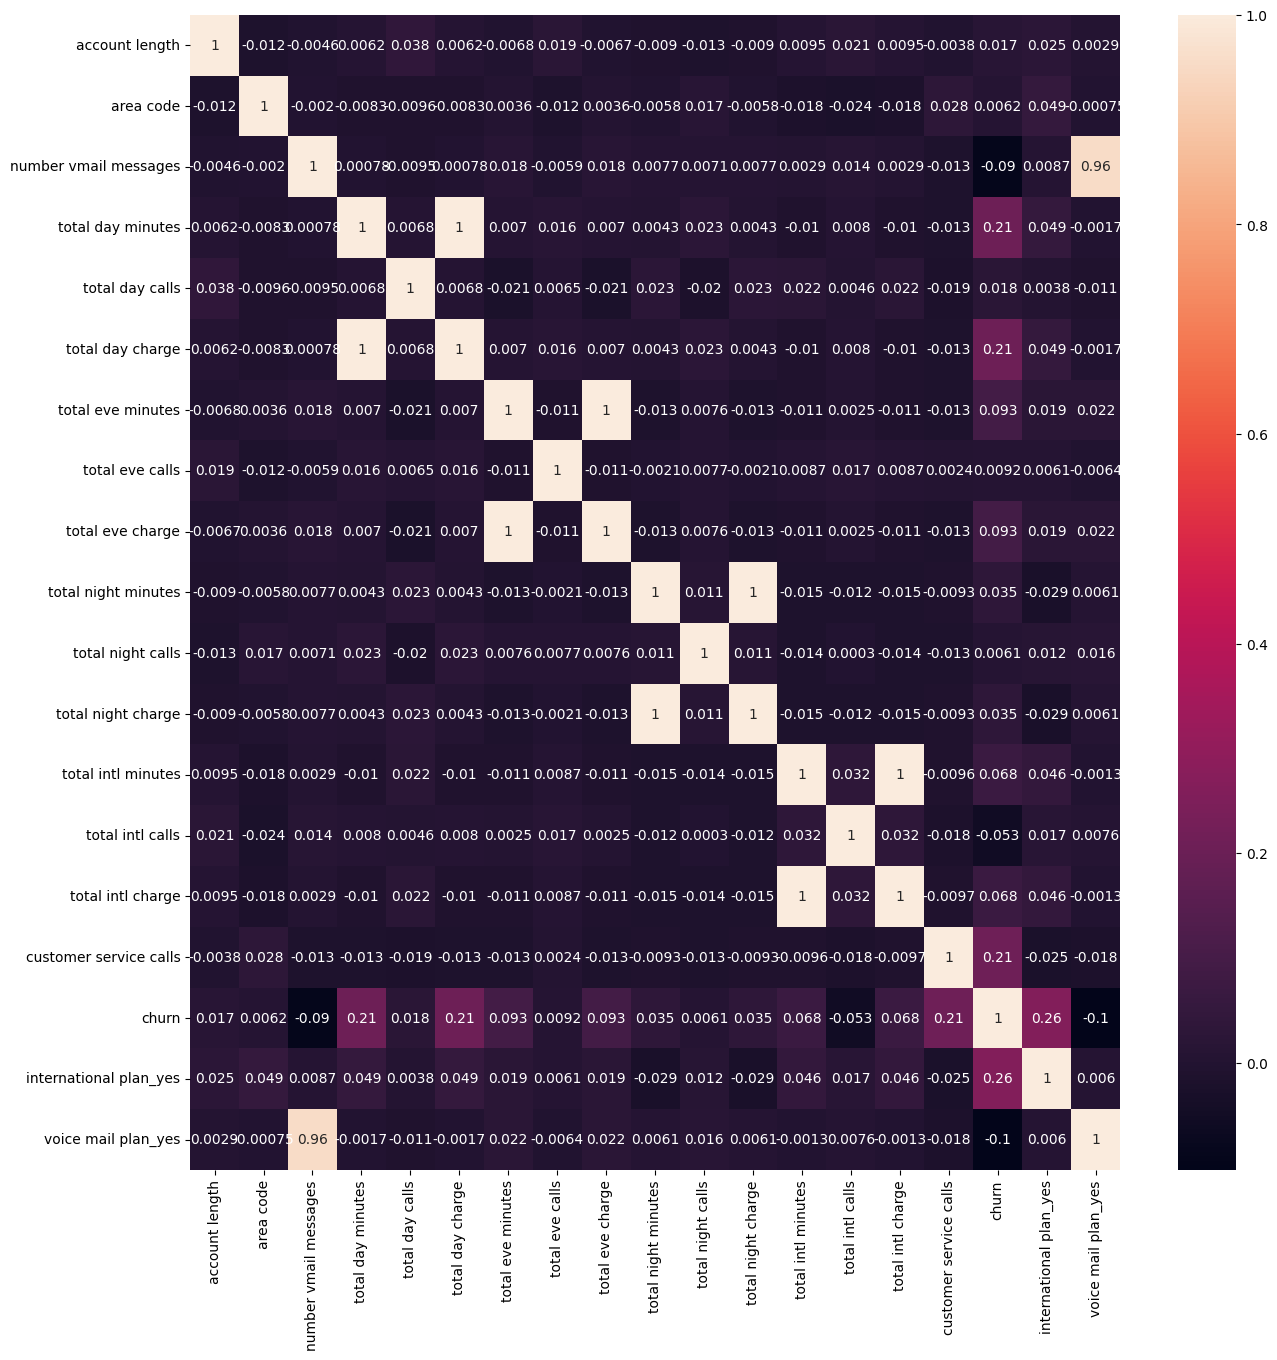

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

**The heatmap reveals that churn is most strongly linked to customer service issues, international plan usage, and high daytime usage, while many features are redundant and can be simplified for better modeling.**

## **CONCLUSION**

**Model Behavior:**

* The model outputs churn probabilities and uses a **30% cutoff** to flag high-risk customers, functioning as a **risk-scoring tool**.

**Performance Snapshot:**

* Some churners are missed (**false negatives**) when risk is below 30%.
* Some non-churners are flagged (**false positives**) when risk exceeds 30%.
* Most non-churners are correctly identified.

**Business Interpretation:**

* A 30% threshold reduces false alarms but may miss potential churners.
* There is a clear trade-off between **retention cost** and **revenue protection**.

**Key Insight:**

* The model effectively ranks churn risk, but **business impact depends on choosing the right probability threshold** aligned with SyriaTel’s strategy.
Yes — **there are predictable patterns**, and this output supports that conclusion.

**Why we can say this:**

* The model assigns **different churn probabilities** to different customers (e.g., 0.05 vs 0.34).
  → This indicates churn is **not random**; it is influenced by underlying customer characteristics.

* Customers with **higher predicted probabilities** are more likely to be flagged as churn risks (e.g., Row 4 at 34%), showing the model has learned **behavioral and usage patterns** associated with churn.

* Even though the model is not perfect (false positives and false negatives exist), it is able to **rank customers by risk**, which is the key evidence of pattern detection.

**What this means conceptually:**

* Certain combinations of features (such as contract type, service issues, usage levels, or billing behavior) consistently increase churn risk.
* Other feature combinations are associated with customer retention.

**Business conclusion:**

> Customer churn at SyriaTel follows identifiable behavioral patterns that can be learned and predicted using historical data, enabling proactive and targeted retention strategies.

This directly answers the project question: **yes, churn is predictable to a meaningful extent**, and those patterns can be leveraged for decision-making.
